# Importanto base de dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dados = pd.read_csv('tips.csv')
#dados = pd.read_csv('tips_atualizado.csv')

dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# Tradução

In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
new_names = {'total_bill':'valor_conta', 'tip':'gorjeta', 'dessert':'sobremesa', 'day':'dia_semana', 'time':'hora_dia', 'size':'total_pessoas'}

In [5]:
gorjeta = dados.rename(columns = new_names)

In [6]:
gorjeta

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [7]:
gorjeta['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
gorjeta['sobremesa'] = gorjeta['sobremesa'].apply(lambda x: 'Sim' if x == 'Yes' else 'Não')
gorjeta

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [9]:
gorjeta['dia_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dia_semana = {'Sun':'Domingo', 'Sat':'Sábado', 'Thur':'Quinta', 'Fri':'Sexta'}

In [11]:
gorjeta['dia_semana'] = gorjeta['dia_semana'].map(dia_semana)

In [12]:
gorjeta

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Dinner,3
240,27.18,2.00,Sim,Sábado,Dinner,2
241,22.67,2.00,Sim,Sábado,Dinner,2
242,17.82,1.75,Não,Sábado,Dinner,2


In [13]:
gorjeta['hora_dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
gorjeta['hora_dia'] = gorjeta['hora_dia'].map({'Dinner':'Jantar', 'Lunch':'Almoço'})
gorjeta

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# Análise 1 - Valor da conta e gorjeta

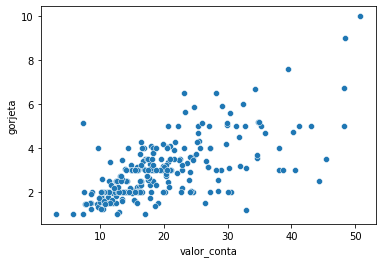

In [15]:
sns.scatterplot(data = gorjeta,x='valor_conta',y='gorjeta')

**Visualmente,o valor da gorjeta aumenta conforme o aumento do valor da conta**

In [16]:
gorjeta.notnull().count()

valor_conta      244
gorjeta          244
sobremesa        244
dia_semana       244
hora_dia         244
total_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [17]:
gorjeta['porcentagem'] = round(gorjeta['gorjeta']/gorjeta['valor_conta'],2)
gorjeta

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


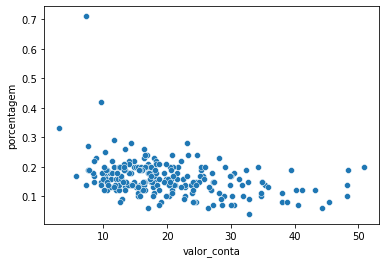

In [18]:
sns.scatterplot(data=gorjeta,x='valor_conta',y='porcentagem')

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

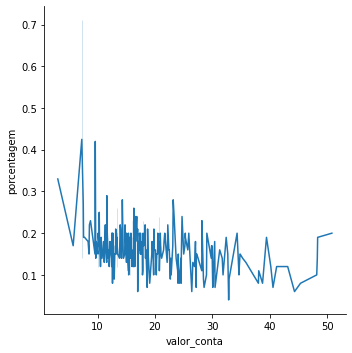

In [19]:
sns.relplot(data=gorjeta,x='valor_conta',y='porcentagem',kind='line')

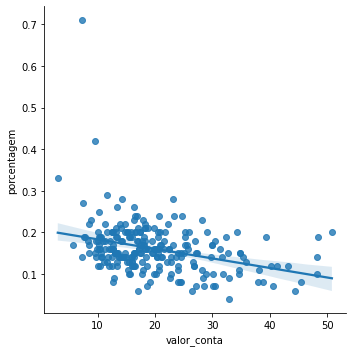

In [20]:
sns.lmplot(data=gorjeta,x='valor_conta',y='porcentagem')

# Análise 2 - Sobremesa 

In [21]:
gorjeta.query("sobremesa == 'Sim'").describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [22]:
gorjeta.query("sobremesa == 'Não'").describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


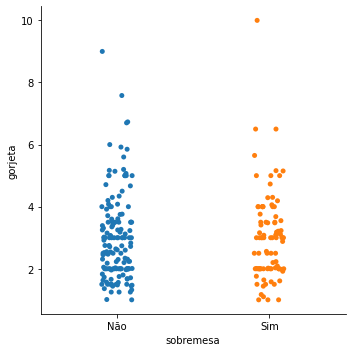

In [23]:
sns.catplot(data = gorjeta,x='sobremesa',y='gorjeta')

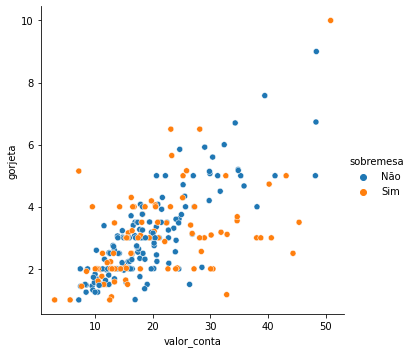

In [24]:
sns.relplot(data=gorjeta,x='valor_conta',y='gorjeta',hue='sobremesa')

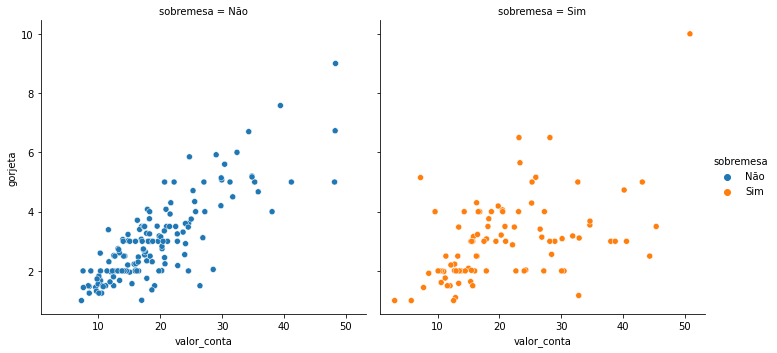

In [25]:
sns.relplot(data=gorjeta,x='valor_conta',y='gorjeta',hue='sobremesa',col='sobremesa')

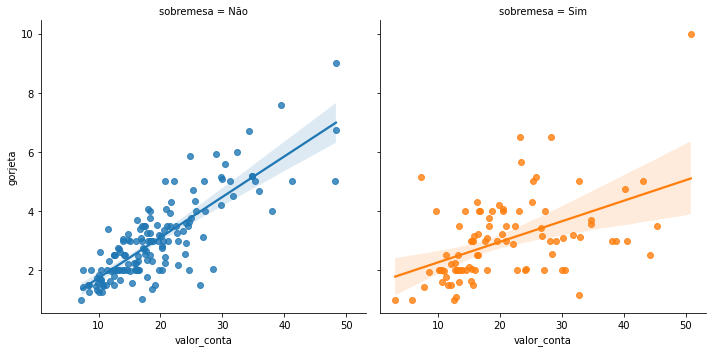

In [26]:
sns.lmplot(data=gorjeta,x='valor_conta',y='gorjeta',hue='sobremesa',col='sobremesa')

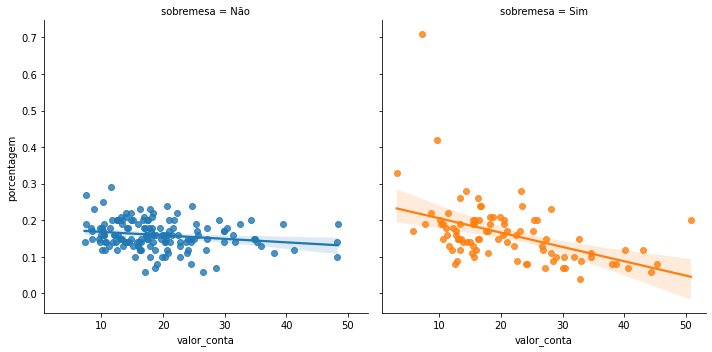

In [27]:
sns.lmplot(data=gorjeta,x='valor_conta',y='porcentagem',hue='sobremesa',col='sobremesa')

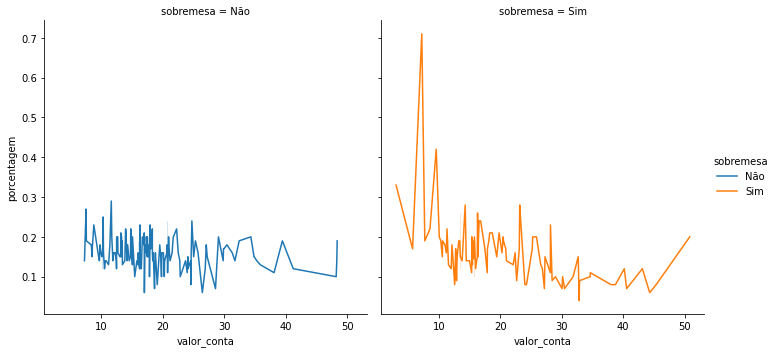

In [28]:
sns.relplot(data=gorjeta,x='valor_conta',y='porcentagem',hue='sobremesa',col='sobremesa',kind='line')

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa em relação aqueles que não pediram**

## Teste de hipótese

**H<sub>0</sub>: A distribuição da taxa da gorjeta é a mesma nos dois grupos** 

**H<sub>1</sub>: A distribuição da taxa da gorjeta é diferente nos dois grupos** 

In [29]:
from scipy.stats import ranksums

In [30]:
sobremesa = gorjeta[gorjeta.sobremesa == 'Sim'].porcentagem

In [31]:
sem_sobremesa = gorjeta[gorjeta.sobremesa == 'Não'].porcentagem

In [32]:
_,pvalue = ranksums(sobremesa,sem_sobremesa)

In [33]:
print(f"O valor do p-value é {pvalue}. Poranto não rejeitamos a hipótese nula.")

O valor do p-value é 0.5266635660124415. Poranto não rejeitamos a hipótese nula.


# Análise 3 - Dia da semana

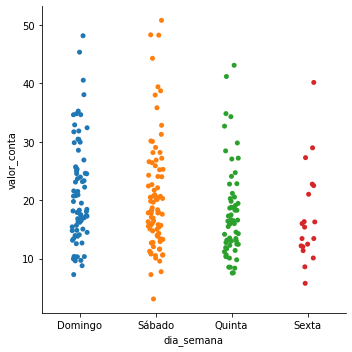

In [34]:
sns.catplot(data=gorjeta,x='dia_semana',y='valor_conta')

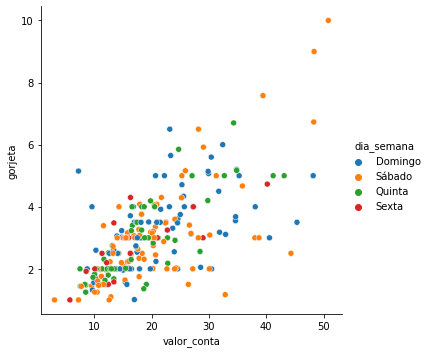

In [35]:
sns.relplot(data=gorjeta,x='valor_conta',y='gorjeta',hue='dia_semana')

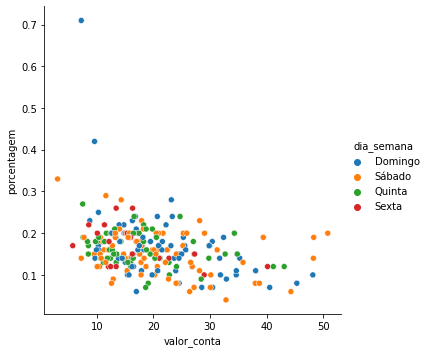

In [36]:
sns.relplot(data=gorjeta,x='valor_conta',y='porcentagem',hue='dia_semana')

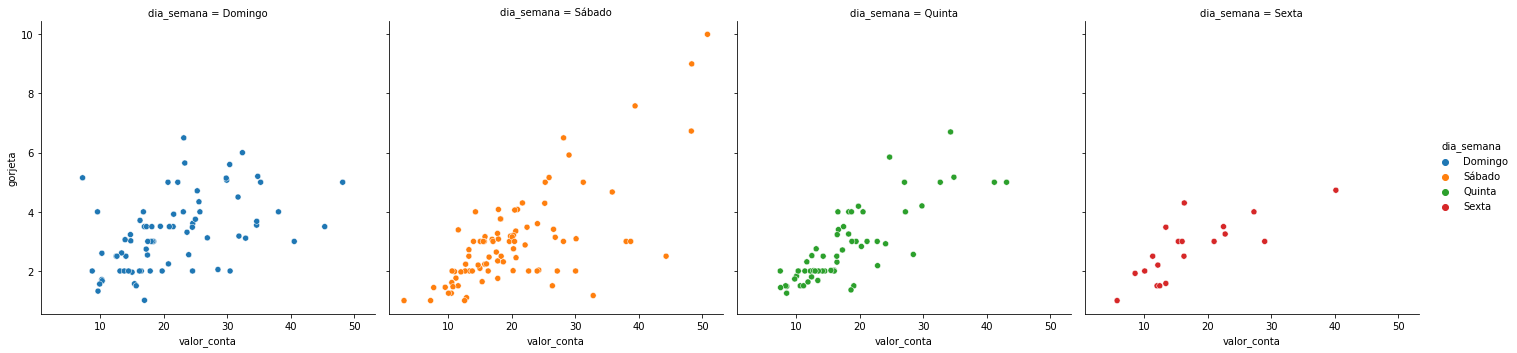

In [37]:
sns.relplot(data=gorjeta,x='valor_conta',y='gorjeta',hue='dia_semana',col='dia_semana')

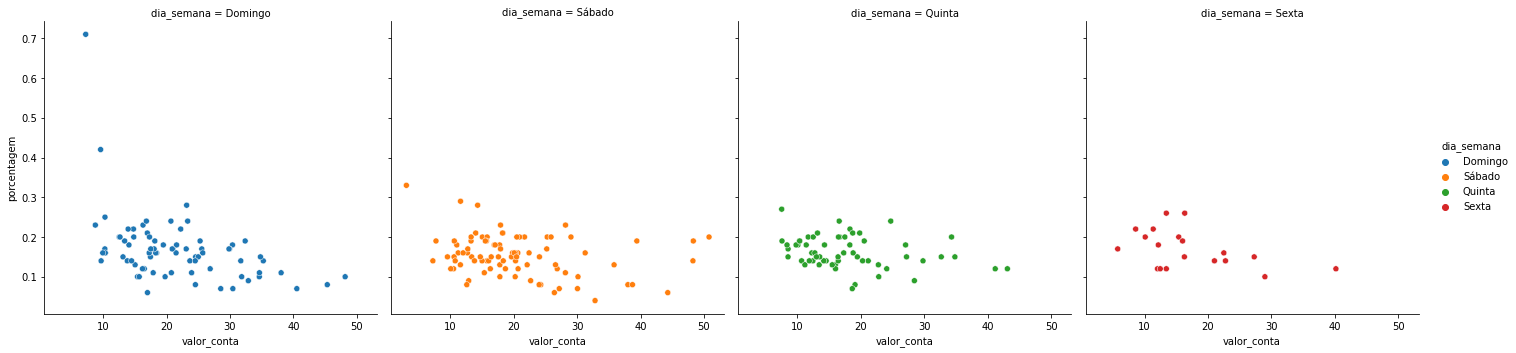

In [38]:
sns.relplot(data=gorjeta,x='valor_conta',y='porcentagem',hue='dia_semana',col='dia_semana')

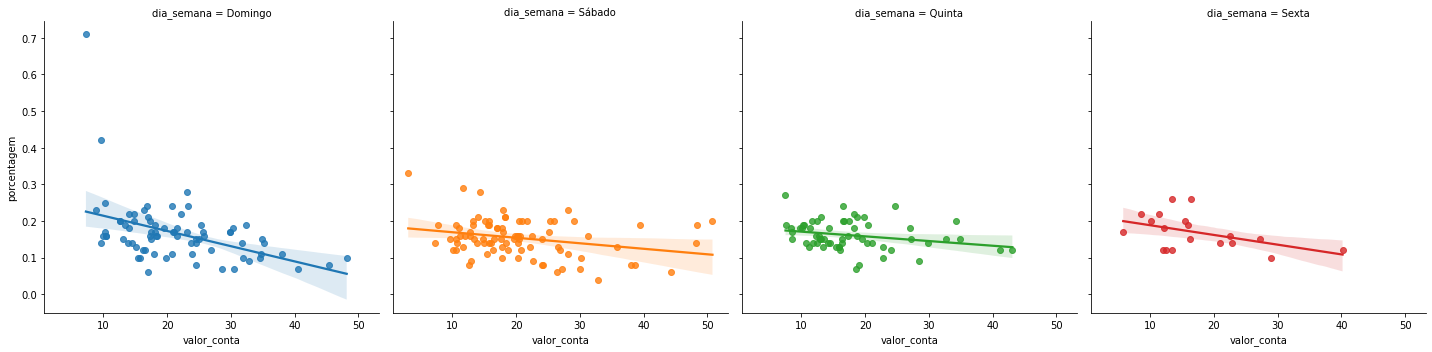

In [39]:
sns.lmplot(data=gorjeta,x='valor_conta',y='porcentagem',hue='dia_semana',col='dia_semana')

In [40]:
media_gorjeta = gorjeta.gorjeta.mean()

In [41]:
print(f'A média geral das gorjetas é {media_gorjeta}')

A média geral das gorjetas é 2.9982786885245902


In [42]:
gorjeta.groupby(['dia_semana']).mean().drop(['total_pessoas'],axis=1)

,valor_conta,gorjeta,porcentagem
dia_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [43]:
gorjeta.dia_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_semana, dtype: int64

## Teste de hipótese

**H<sub>0</sub>: A média das gorjetas do Sábado e Domingo é a mesma**

**H<sub>1</sub>: A média das gorjetas do Sábado e Domingo é distinta**

In [44]:
from statsmodels.stats.weightstats import CompareMeans,DescrStatsW

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
sabado_gorjeta = DescrStatsW(gorjeta[gorjeta['dia_semana']=='Sábado'].gorjeta)
domingo_gorjeta = DescrStatsW(gorjeta[gorjeta['dia_semana']=='Domingo'].gorjeta)
teste = CompareMeans(sabado_gorjeta,domingo_gorjeta)
_,p_value = teste.ztest_ind(usevar = "unequal")

In [46]:
print(f'O p-value é {p_value}. Portanto não rejeitamos a hipótese nula')

O p-value é 0.2442722959921444. Portanto não rejeitamos a hipótese nula


# Análise 4 - Hora do dia

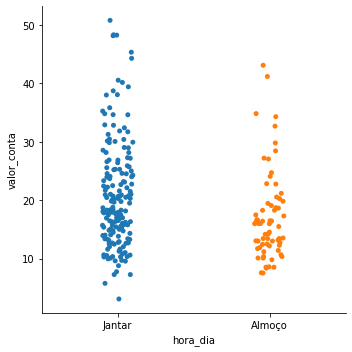

In [47]:
sns.catplot(data=gorjeta,x='hora_dia',y='valor_conta')

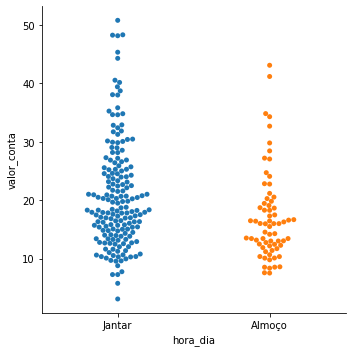

In [48]:
sns.catplot(data=gorjeta,x='hora_dia',kind='swarm',y='valor_conta')

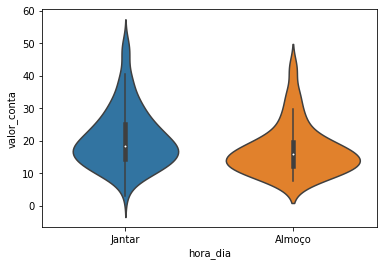

In [49]:
sns.violinplot(data=gorjeta,x='hora_dia',y='valor_conta')

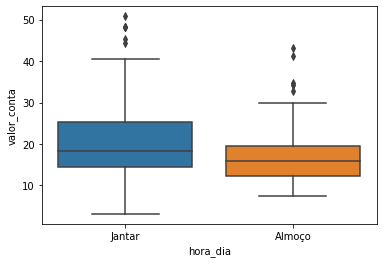

In [50]:
sns.boxplot(data=gorjeta,x='hora_dia',y='valor_conta')

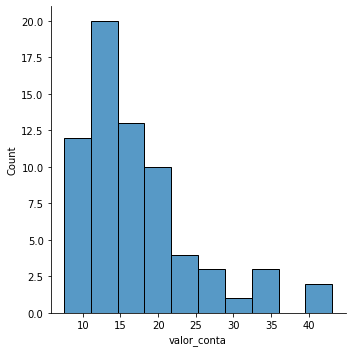

In [51]:
sns.displot(gorjeta.query("hora_dia == 'Almoço'")['valor_conta'])

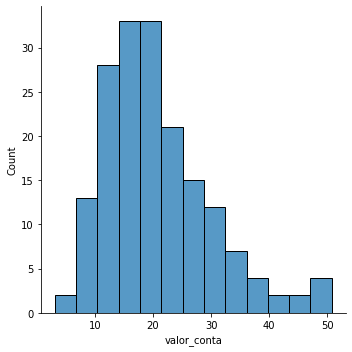

In [52]:
sns.displot(gorjeta.query("hora_dia == 'Jantar'")['valor_conta'])

In [53]:
gorjeta.groupby('hora_dia').mean().drop('total_pessoas',axis=1)

,valor_conta,gorjeta,porcentagem
hora_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sub>0</sub>: A distribuição do valor da conta é igual no jantar e no almoço** 

**H<sub>1</sub>: A distribuição do valor da conta é diferente no jantar e no almoço**

In [54]:
_,p_value = ranksums(gorjeta.query("hora_dia == 'Jantar'")['valor_conta'],gorjeta.query("hora_dia == 'Almoço'")['valor_conta'])

In [55]:
print(f'O valor do p-value é {p_value}. Portanto rejeitamos a hipótese nula com significância de 5%')

O valor do p-value é 0.0011791039723641672. Portanto rejeitamos a hipótese nula com significância de 5%


## Teste de hipótese 2

**H<sub>0</sub>: A distribuição da taxa da gorjeta é igual no jantar e no almoço** 

**H<sub>1</sub>: A distribuição da taxa da gorjeta é diferente no jantar e no almoço**

In [56]:
porcentagem_almoço = gorjeta.query('hora_dia=="Almoço"').porcentagem

In [57]:
porcentagem_jantar = gorjeta.query('hora_dia=="Jantar"').porcentagem

In [58]:
_,p_value = ranksums(porcentagem_almoço,porcentagem_jantar)

In [59]:
print(f'O valor do p-value é {p_value}. Portanto não rejeitamos a hipótese nula com significância de 5%')

O valor do p-value é 0.2602493995587126. Portanto não rejeitamos a hipótese nula com significância de 5%
